In [361]:
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import scipy, pylab
import datetime 
import seaborn as sns


df = pd.read_csv('billion_dollar_edit.csv')
df = df.rename(columns = {'Total CPI-Adjusted Cost (Millions of Dollars)': 'Total Adjusted Cost'})
df.head()

,Name,Disaster,Begin Date,End Date,Total Adjusted Cost,Deaths,Year
0,Southeastern Severe Storms (March 2018),Severe Storm,3/18/2018,3/21/2018,1310.0,3,2018
1,Northeast Winter Storm (March 2018),Winter Storm,3/1/2018,3/3/2018,1770.0,9,2018
2,Central and Eastern Winter Storm (January 2018),Winter Storm,1/3/2018,1/5/2018,1043.0,22,2018
3,"Western Wildfires, California Firestorm (Summe...",Wildfire,6/1/2017,12/31/2017,18185.1,54,2017
4,"North Dakota, South Dakota and Montana Drought...",Drought,3/1/2017,12/31/2017,2525.0,0,2017


In [362]:
df['Begin Date'] = pd.to_datetime(df['Begin Date'])
df['End Date'] = pd.to_datetime(df['End Date'])

In [364]:
df['Length of Disaster'] = df['End Date'] - df['Begin Date']
df.head()

,Name,Disaster,Begin Date,End Date,Total Adjusted Cost,Deaths,Year,Length of Disaster
0,Southeastern Severe Storms (March 2018),Severe Storm,2018-03-18,2018-03-21,1310.0,3,2018,3 days
1,Northeast Winter Storm (March 2018),Winter Storm,2018-03-01,2018-03-03,1770.0,9,2018,2 days
2,Central and Eastern Winter Storm (January 2018),Winter Storm,2018-01-03,2018-01-05,1043.0,22,2018,2 days
3,"Western Wildfires, California Firestorm (Summe...",Wildfire,2017-06-01,2017-12-31,18185.1,54,2017,213 days
4,"North Dakota, South Dakota and Montana Drought...",Drought,2017-03-01,2017-12-31,2525.0,0,2017,305 days


In [373]:
new_df = df[['Year ','Deaths','Total Adjusted Cost']].groupby('Year ').sum()
new_df.head()

,Deaths,Total Adjusted Cost
Year,,
1980,1280,36213.6
1981,20,2783.9
1982,243,12304.3
1983,172,20323.5
1984,81,2560.4


## Have Disasters been increasing in cost? Have they increased in Death Count?


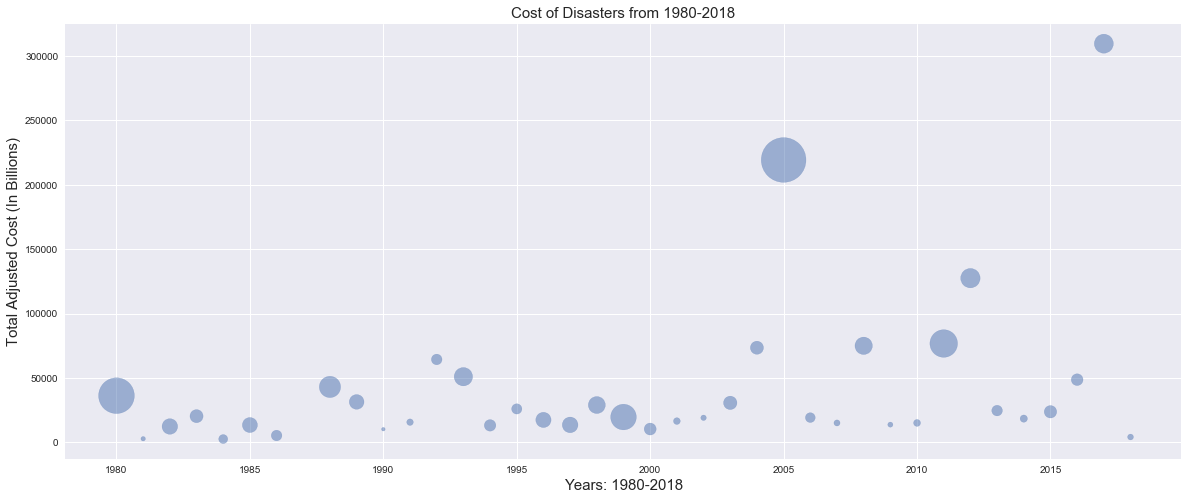

In [367]:
fig = plt.figure()
plt.figure(figsize=(20, 8))

txt = 'Size of Circle Corresponds with Death Count'

y = new_df['Total Adjusted Cost'].values
x = new_df.index.values


plt.scatter(x,y,s =new_df['Deaths'],alpha=0.5)

plt.xlabel('Years: 1980-2018', fontsize = 15)
plt.ylabel('Total Adjusted Cost (In Billions)', fontsize = 15)
plt.title('Cost of Disasters from 1980-2018', fontsize = 15)
plt.grid(True)

fig.text(.5, .05, txt, ha='center', fontsize = 15)
plt.savefig('cost_of_disasters.png')


plt.show()

In [304]:
df['Disaster'].value_counts()

Severe Storm        96
Tropical Cyclone    40
Flooding            29
Drought             25
Winter Storm        16
Wildfire            15
Freeze               9
Name: Disaster, dtype: int64

In [374]:
disaster_df = df.groupby(['Disaster','Year ','Total Adjusted Cost','Length of Disaster','Deaths']).count().Name.unstack('Disaster', fill_value=0).reset_index()
disaster_df.head(120)

Disaster,Year,Total Adjusted Cost,Length of Disaster,Deaths,Drought,Flooding,Freeze,Severe Storm,Tropical Cyclone,Wildfire,Winter Storm
0,1980,1888.0,4 days,13,0,0,0,0,1,0,0
1,1980,2261.6,7 days,7,0,1,0,0,0,0,0
2,1980,32064.0,182 days,1260,1,0,0,0,0,0,0
3,1981,1148.0,5 days,20,0,0,0,1,0,0,0
4,1981,1635.9,2 days,0,0,0,1,0,0,0,0
5,1982,1267.0,10 days,30,0,0,0,1,0,0,0
6,1982,1275.5,2 days,33,0,0,0,1,0,0,0
7,1982,1747.5,8 days,85,0,0,0,0,0,0,1
8,1982,3959.0,108 days,50,0,1,0,0,0,0,0
9,1982,4055.3,45 days,45,0,1,0,0,0,0,0


In [377]:
disaster_types = ['Severe Storm', 'Tropical Cyclone', 'Flooding', 'Drought',
        'Winter Storm', 'Wildfire', 'Freeze']

In [378]:
severe_storm = types.get_group('Severe Storm')
tropical_cyclone = types.get_group('Tropical Cyclone')
flooding = types.get_group('Flooding')
drought = types.get_group('Drought')
winter_storm = types.get_group('Winter Storm')
wildfire = types.get_group('Wildfire')
freeze = types.get_group('Freeze')

## Which disaster types have are associated with the highest cost/death count?


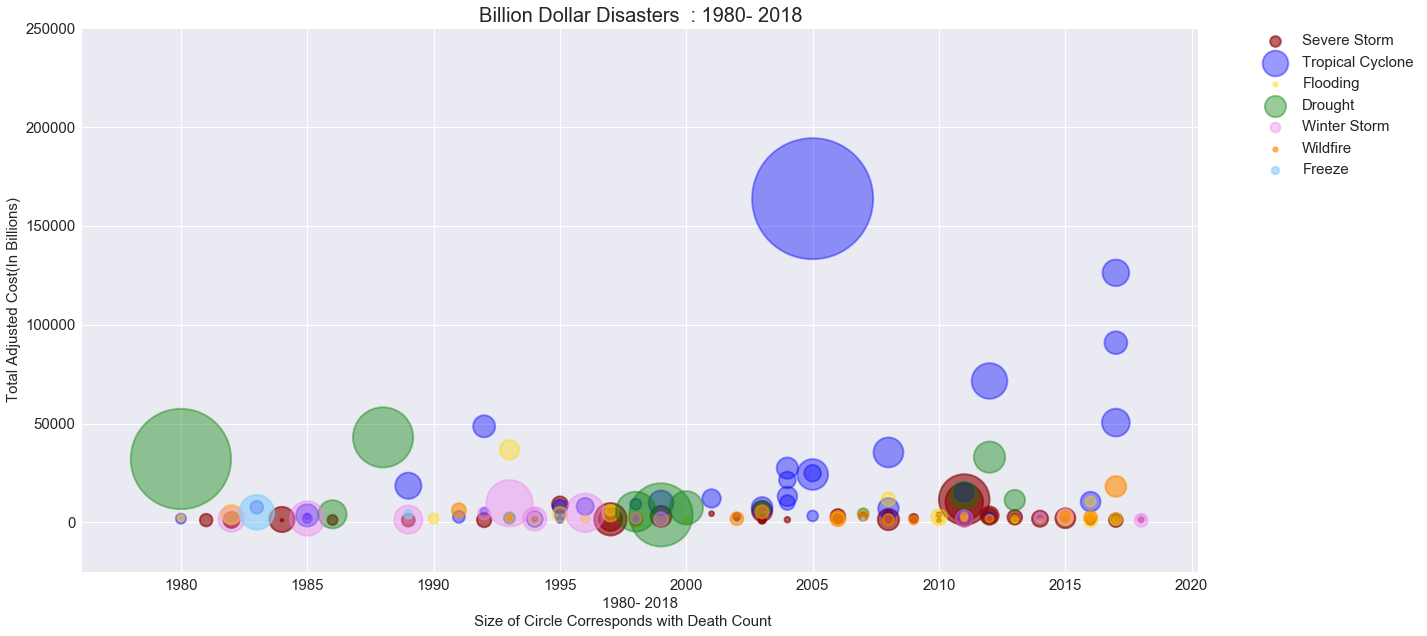

In [380]:
fig = plt.figure()
ax = fig.add_subplot(111) 
txt = "Size of Circle Corresponds with Death Count"


ax.scatter(severe_storm['Year '], severe_storm['Total Adjusted Cost'],s = severe_storm['Deaths']*8, color = 'darkred',alpha = 0.6, linewidth = 1.9) 
ax.scatter(tropical_cyclone['Year '], tropical_cyclone['Total Adjusted Cost'],s = tropical_cyclone['Deaths']*8, color = 'blue',alpha = 0.4, linewidth = 1.9) 
ax.scatter(flooding['Year '], flooding['Total Adjusted Cost'], s = flooding['Deaths']*8,color = 'gold',alpha = 0.4, linewidth = 1.9) 
ax.scatter(drought['Year '], drought['Total Adjusted Cost'],s = drought['Deaths']*8, color = 'green',alpha = 0.4, linewidth = 1.9) 
ax.scatter(winter_storm['Year '], winter_storm['Total Adjusted Cost'],s = winter_storm['Deaths']*8, color = 'violet',alpha = 0.4, linewidth = 1.9)
ax.scatter(wildfire['Year '], wildfire['Total Adjusted Cost'],s = wildfire['Deaths']*8, color = 'darkorange',alpha = 0.6, linewidth = 1.9)
ax.scatter(freeze['Year '], freeze['Total Adjusted Cost'], s = freeze['Deaths']*8, color = 'lightskyblue',alpha = 0.6, linewidth = 1.9)


ax.tick_params(axis='both', which='major', labelsize = 15)

plt.ylim(-25000, 250000)

plt.xlabel('1980- 2018', fontsize = 15)
plt.ylabel('Total Adjusted Cost(In Billions)', fontsize = 15)
plt.title('Billion Dollar Disasters  : 1980- 2018', fontsize = 20)

pylab.rcParams['figure.figsize'] = (20, 10)
plt.legend((list(disaster_types)), bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize = 15, markerscale = .3)
plt.grid(True)

fig.text(.5, .05, txt, ha='center', fontsize = 15)

plt.savefig('billion_dollar_disasters.png')

plt.show()






In [312]:
disaster_df.head()

Disaster,Year,Total Adjusted Cost,Length of Disaster,Deaths,Drought,Flooding,Freeze,Severe Storm,Tropical Cyclone,Wildfire,Winter Storm
0,1980,1888.0,4 days,13,0,0,0,0,1,0,0
1,1980,2261.6,7 days,7,0,1,0,0,0,0,0
2,1980,32064.0,182 days,1260,1,0,0,0,0,0,0
3,1981,1148.0,5 days,20,0,0,0,1,0,0,0
4,1981,1635.9,2 days,0,0,0,1,0,0,0,0


## Which year is saw the most expensive disasters?

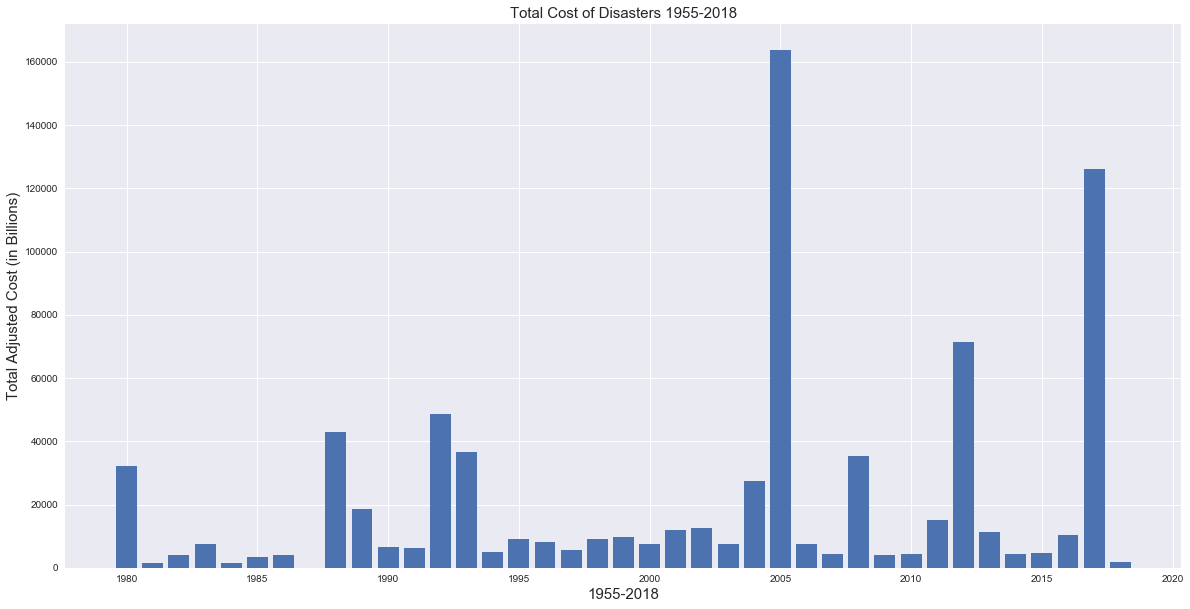

In [325]:
plt.bar(disaster_df['Year '], disaster_df['Total Adjusted Cost'])

plt.title('Total Cost of Disasters 1955-2018', fontsize = 15)
plt.xlabel('1955-2018', fontsize = 15)
plt.ylabel('Total Adjusted Cost (in Billions)', fontsize = 15)

plt.savefig('total_cost_by_year.png')

In [335]:
new_df = df.groupby('Disaster')['Total Adjusted Cost'].sum().reset_index()
new_df

,Disaster,Total Adjusted Cost
0,Drought,238921.9
1,Flooding,122340.9
2,Freeze,29449.3
3,Severe Storm,214204.4
4,Tropical Cyclone,861942.3
5,Wildfire,54285.3
6,Winter Storm,46346.4


## What Disaster costs the most?


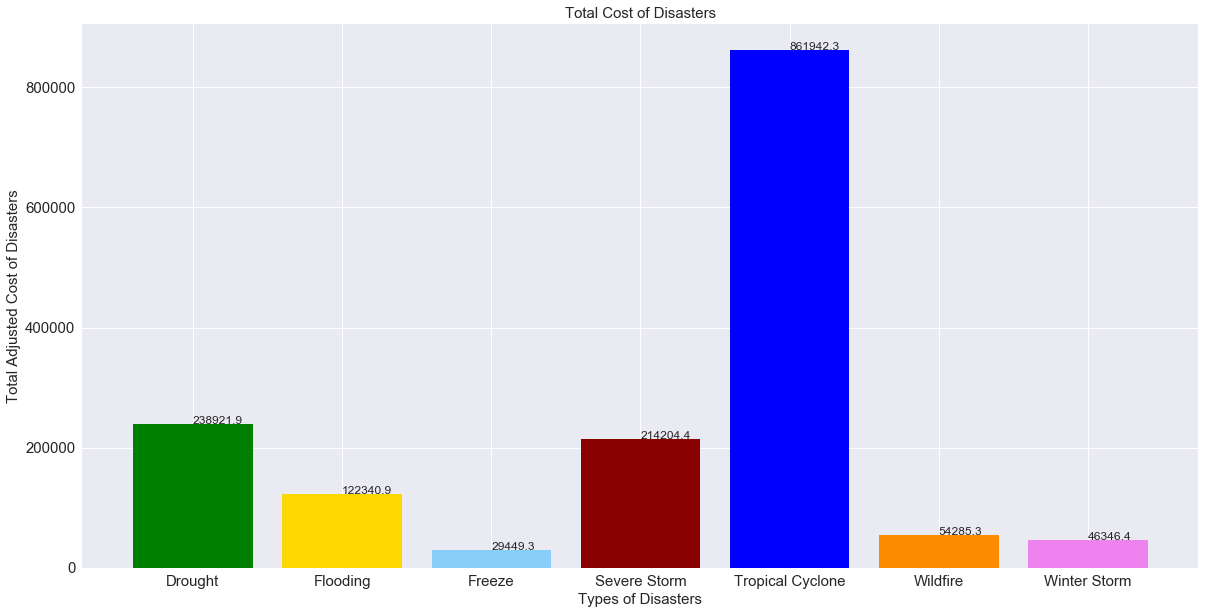

In [343]:
fig = plt.figure()

count = 0

for disaster in new_df['Total Adjusted Cost']:
    plt.text(count, disaster, str(round(disaster,2)))
    count = count + 1
    space = 7
    fontsize = 15



plt.bar(new_df['Disaster'], new_df['Total Adjusted Cost'], color=['green', 'gold', 'lightskyblue', 'darkred', 'blue','darkorange', 'violet'])

plt.title('Total Cost of Disasters', fontsize = 15)
plt.xlabel('Types of Disasters', fontsize = 15)
plt.ylabel('Total Adjusted Cost of Disasters', fontsize = 15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

plt.savefig('total_cost_by_disaster.png')